# Explore here

In [314]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [315]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv', delimiter=',')

dataframe.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [316]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [317]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [318]:
dataframe = dataframe[['Latitude', 'Longitude', 'MedInc']]
dataframe.head(5)

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


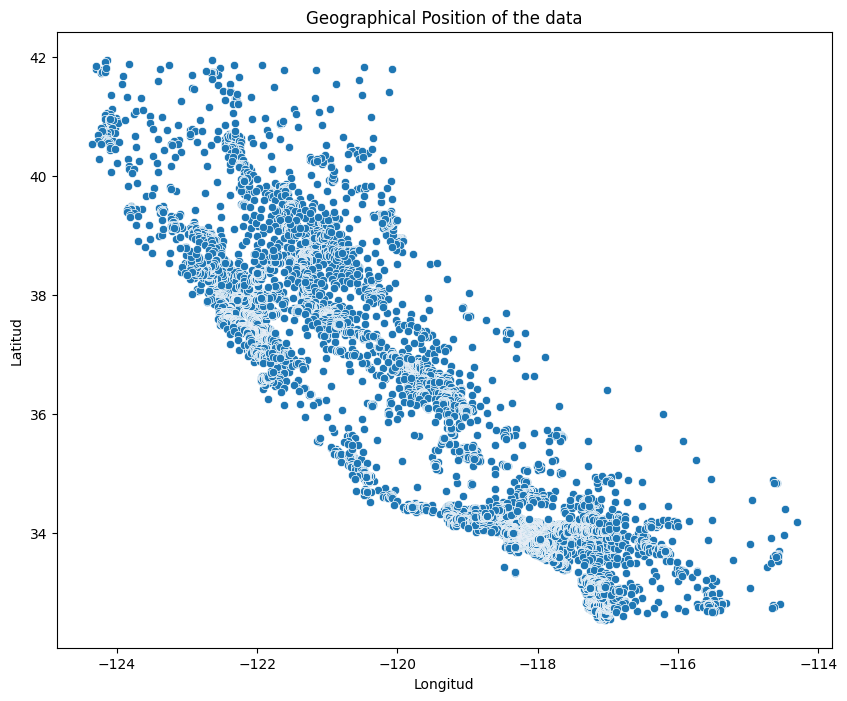

In [319]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=dataframe)
plt.title('Geographical Position of the data')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

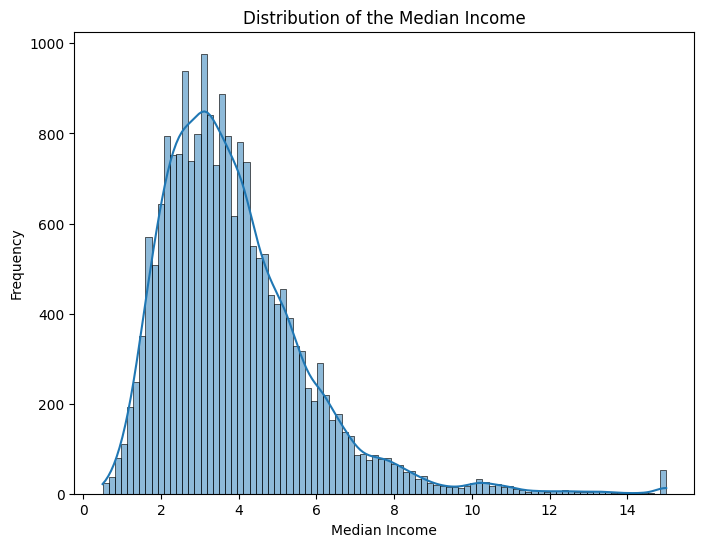

In [320]:
plt.figure(figsize=(8, 6))
sns.histplot(dataframe['MedInc'], kde=True)
plt.title('Distribution of the Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

In [321]:
data_train, data_test = train_test_split(dataframe, test_size=0.2, random_state=42)
data_train.head(5)

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [322]:
data_train.to_csv("../data/processed/data_train_ts_02_rs_42.csv", index=False)
data_test.to_csv("../data/processed/data_test_ts_02_rs_42.csv", index=False)

In [323]:
k_means_model = KMeans(n_clusters=6, random_state=42)
k_means_model.fit(dataframe)

KMeans(n_clusters=6, random_state=42)

In [324]:
dataframe['cluster'] = k_means_model.labels_

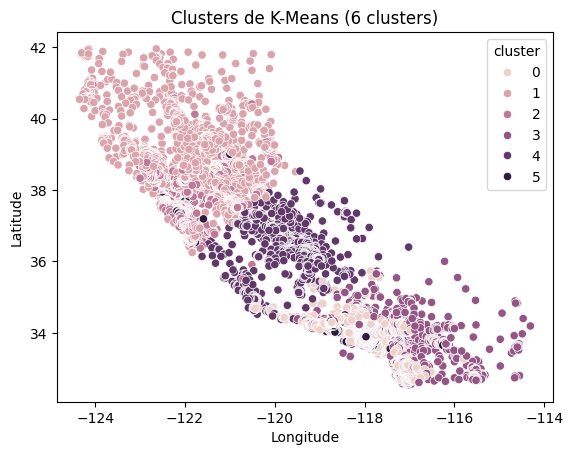

In [325]:
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=dataframe)
plt.title('Clusters de K-Means (6 clusters)')
plt.show()

Title: The diagram is labeled as a K-Means clustering result with 6 clusters, meaning the algorithm has grouped the houses into 6 different clusters.

Clusters and Data Points:

Each data point on the scatter plot represents a group of houses, positioned according to their geographic coordinates (latitude and longitude).

These points are color-coded to distinguish the 6 clusters. Each color represents a different cluster, indicating that houses within the same cluster are more similar to each other in terms of location and potentially median income.

Axes:

The x-axis (horizontal axis) shows the longitude, which helps in identifying the east-west positioning of the data points.

The y-axis (vertical axis) shows the latitude, which helps in identifying the north-south positioning of the data points.

Legend:

The legend on the right side lists the cluster numbers (0 to 5) and their corresponding colors. This helps to identify which cluster each data point belongs to.

Cluster Centers:

There might be special markers or symbols representing the centers of each cluster, calculated by the K-Means algorithm. These centers are essentially the average position of all the data points within each cluster.

In [326]:
data_test['cluster'] = k_means_model.predict(data_test)

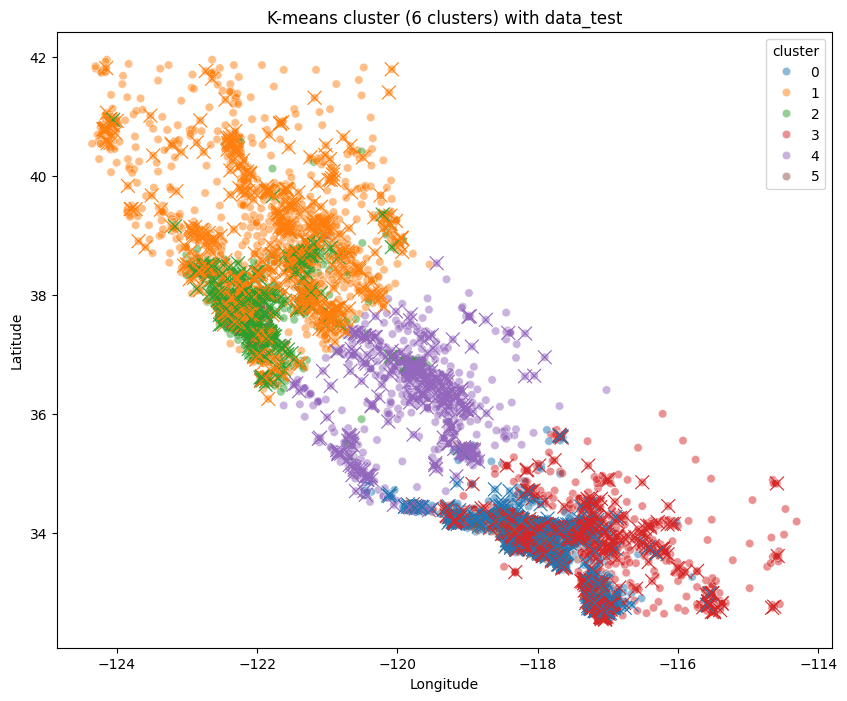

In [327]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=dataframe, alpha=0.5, palette='tab10', legend='full')
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=data_test, marker='x', s=100, palette='tab10', legend=False)
plt.title('K-means cluster (6 clusters) with data_test')
plt.show()


Cluster coherence:

The graph shows that the points in the test set (data_test), represented by "x" markers, are distributed consistently with the clusters formed by the original data set (dataframe).
This indicates that the k-means model trained on the original data set generalizes well to the new test set data.

Satisfactory predictions:

Most of the test set points lie within the boundaries of the corresponding clusters, suggesting that the model predictions are satisfactory.
There are a few scattered spots, but nothing out of the ordinary

In [328]:
dump(k_means_model, "../models/unsupervised_model.sav")

['../models/unsupervised_model.sav']

In [329]:
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('cluster', axis=1), dataframe['cluster'], test_size=0.2, random_state=42)
X_train.to_csv("../data/processed/X_train_ts_02_rs_42.csv", index=False)
X_test.to_csv("../data/processed/X_test_ts_02_rs_42.csv", index=False)
y_train.to_csv("../data/processed/y_train_ts_02_rs_42.csv", index=False)
y_test.to_csv("../data/processed/y_test_ts_02_rs_42.csv", index=False)

In [330]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Why Random Forest?

Since we have already used K-Means to create well-defined clusters, it makes sense to use a classification model that can learn the decision boundaries between these clusters.
Random Forest, Logistic Regression are more powerful and versatile classification models for this type of problem.
These models can learn complex relationships between features and the target variable 'cluster', and provide better results in terms of accuracy and generalization.

In [331]:
y_pred = random_forest_model.predict(X_test)

In [332]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       817
           1       1.00      0.99      1.00       960
           2       0.99      1.00      0.99       519
           3       1.00      1.00      1.00      1388
           4       1.00      0.99      0.99       338
           5       0.98      0.95      0.97       106

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



In [333]:
dump(random_forest_model, "../models/random_forest_model.sav")

['../models/random_forest_model.sav']

Conclusion:

The Random Forest model is very suitable for classifying the clusters generated by K-Means.
The model shows outstanding performance in terms of accuracy, completeness and F1 score.
The model generalizes well to new data.